## 비지도 학습
- 정답이 없는 데이터를 학습해서 패턴, 특징을 파악
- 데이터를 새롭게 표현해서 ML이 원래 데이터보다 쉽게 해석할 수 있도록 만듦
- 차원 축소
    - 특성이 너무 많아도 과대 적합이 될수 있음
    - 특성(자원)을 줄여서 종부를 축약
- 군집
    - 라벨링에 도움이 됨
    - 비슷한 데이터들끼리 묶어줌

## 차원 축소

In [1]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import mglearn

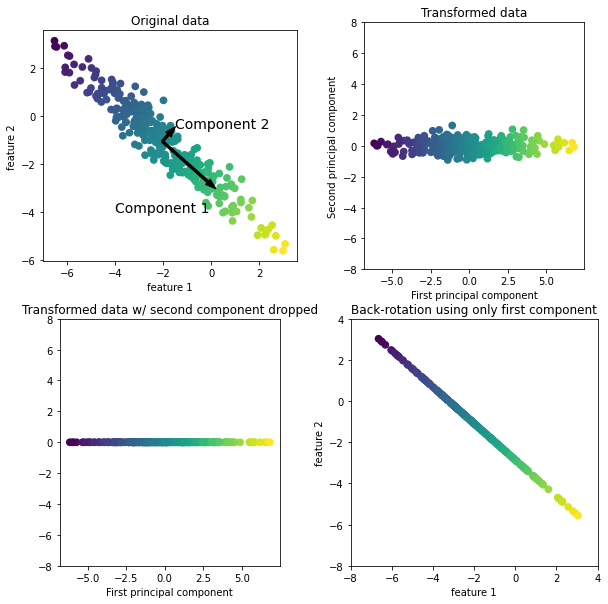

In [3]:
# PCA(주성분 분석)
# Principal Component Analysis
# 장점 : 머심러닝이 판단을 잘 하게 만들어 줄 수 있음
# 단점 : 축이 어디있는지 판단 힘듦, 축을 해석하기가 힘듦
mglearn.plots.plot_pca_illustration()

### IRIS

#### Import library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Iris Data Load

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

#### PCA 활용 4차원 >> 2차원 축소

#### Load PCA

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)

#### 학습

In [8]:
pca.fit(X)

PCA(n_components=2)

#### 차원 축소

In [9]:
pcaX = pca.transform(X)

#### 시각화

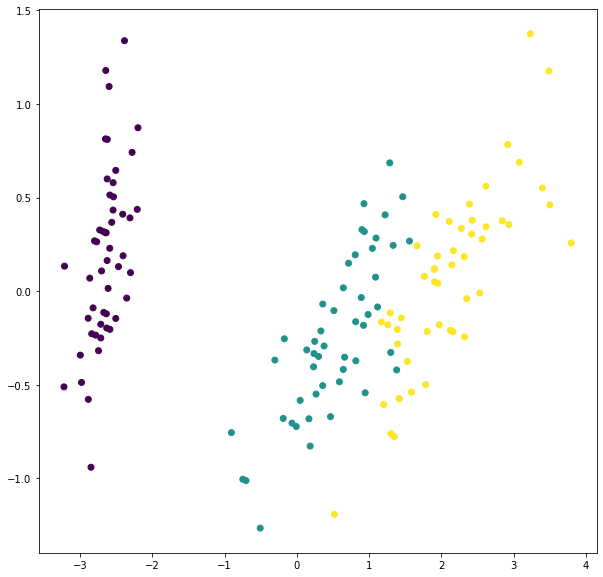

In [10]:
plt.figure(figsize=(10,10))
# 산점도
plt.scatter(pcaX[:,0], # 축소된 0번 컬럼
            pcaX[:,1], # 축소된 1번 컬럼
            c = y) 
plt.show()

### Human Data

#### Human Data Load

In [11]:
from sklearn.datasets import fetch_lfw_people

In [12]:
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)

In [13]:
people.data.shape

(2936, 5655)

In [14]:
people.target

array([17, 17, 14, ..., 14, 15, 14], dtype=int64)

In [15]:
people.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo',
       'Andre Agassi', 'Angelina Jolie', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Atal Bihari Vajpayee', 'Bill Clinton',
       'Carlos Menem', 'Colin Powell', 'David Beckham', 'Donald Rumsfeld',
       'George Robertson', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Gray Davis', 'Hamid Karzai',
       'Hans Blix', 'Hugo Chavez', 'Igor Ivanov', 'Jack Straw',
       'Jacques Chirac', 'Jean Chretien', 'Jennifer Aniston',
       'Jennifer Capriati', 'Jennifer Lopez', 'Jeremy Greenstock',
       'Jiang Zemin', 'John Ashcroft', 'John Negroponte',
       'Jose Maria Aznar', 'Juan Carlos Ferrero', 'Junichiro Koizumi',
       'Kofi Annan', 'Laura Bush', 'Lindsay Davenport', 'Lleyton Hewitt',
       'Luiz Inacio Lula da Silva', 'Mahmoud Abbas',
       'Megawati Sukarnoputri', 'Michael Bloomberg', 'Naomi Watts',
       'Pete Sampras', 'Recep Tayyip Erdogan', 'Ricardo Lagos',
       'Roh Moo-hyun', '

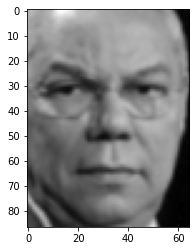

In [16]:
plt.imshow(people.images[500] , cmap = 'gray')

#### 문제와 정답 구성

In [17]:
X = people['data']
y = people['target']

In [18]:
# pixel의 범위 0~255를 0~1로 변환
X = X/255

In [19]:
from sklearn.model_selection import train_test_split
XTrain,XTest,yTrain,yTest = train_test_split(X,y,test_size=0.3,random_state=10)

#### 모델 선정

In [20]:
from sklearn.neighbors import KNeighborsClassifier

#### 학습

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(XTrain,yTrain)

KNeighborsClassifier(n_neighbors=3)

#### 평가

In [22]:
knn.score(XTrain,yTrain),knn.score(XTest,yTest)

(0.5902676399026764, 0.282633371169126)

#### LoadPCA

In [23]:
pca = PCA(n_components=100, whiten = True)

#### PCA 학습

In [24]:
pca.fit(XTrain)

PCA(n_components=100, whiten=True)

#### 차원 축소

In [25]:
XTrainPCA = pca.transform(XTrain)
XTestPCA = pca.transform(XTest)

#### 재학습

In [26]:
knn.fit(XTrainPCA,yTrain)

KNeighborsClassifier(n_neighbors=3)

#### 재평가

In [27]:
knn.score(XTrainPCA,yTrain),knn.score(XTestPCA,yTest)

(0.6690997566909975, 0.37230419977298523)

In [28]:
pca.components_[0].shape

(5655,)

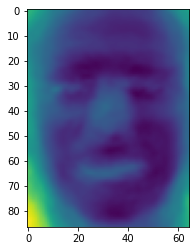

In [29]:
plt.imshow(pca.components_[0].reshape(87,65))

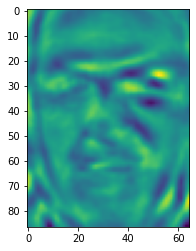

In [30]:
for i in range(len(pca.components_)):
    plt.imshow(pca.components_[i].reshape(87,65))

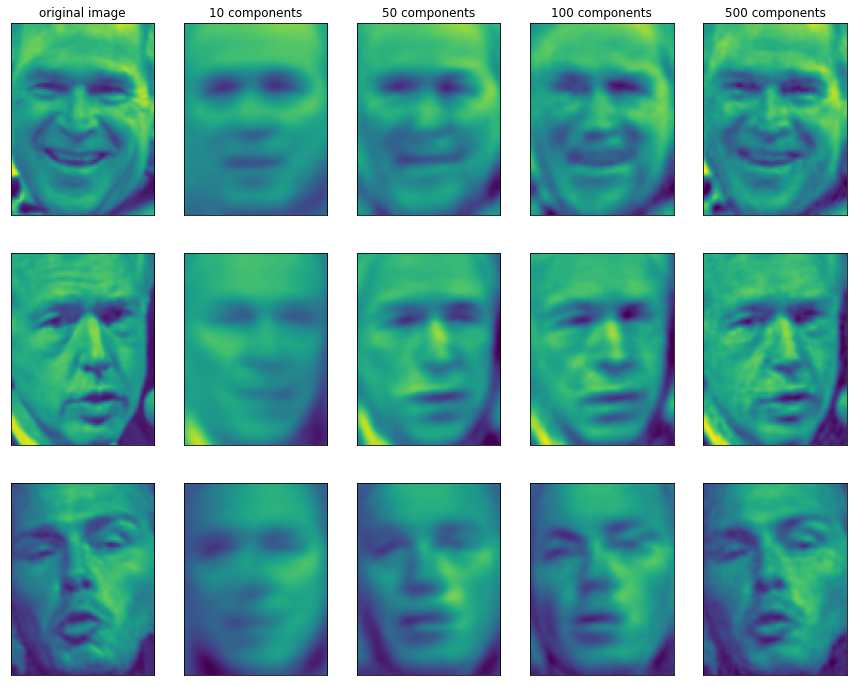

In [31]:
# 주성분으로 이미지 확인하기
mglearn.plots.plot_pca_faces(XTrain, XTest , (87,65))

In [32]:
# 비음수 행렬분해 NNF >> Non-negatvie Matrix Factorization
# PCA와 같은 사용법